In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
df = pd.read_csv('../data/TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
df.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


### Visualize the data

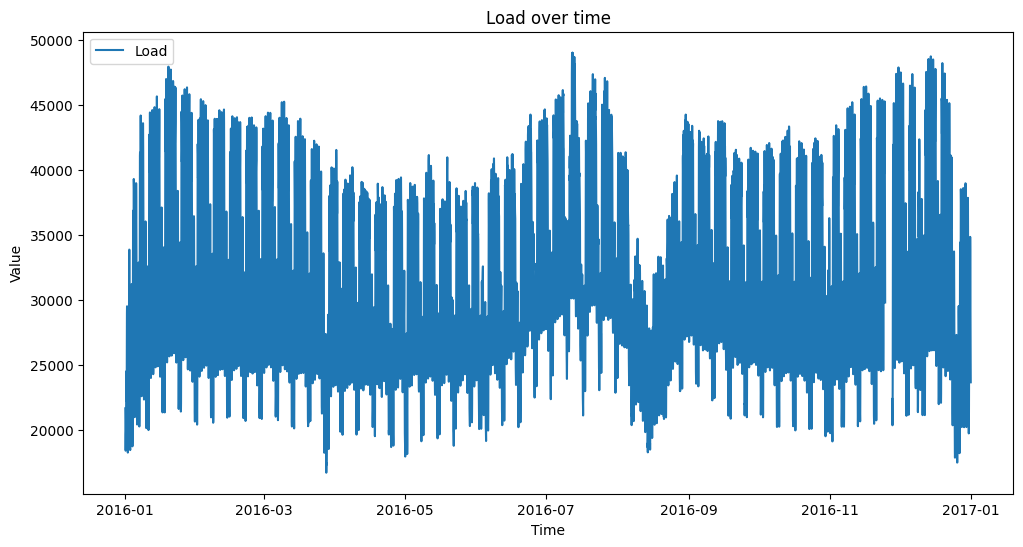

In [5]:
# Convert utc_timestamp to datetime
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

# Plot the data
plt.figure(figsize=(12,6))

plt.plot(df['utc_timestamp'], df['IT_load_new'], label='Load')
plt.title('Load over time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

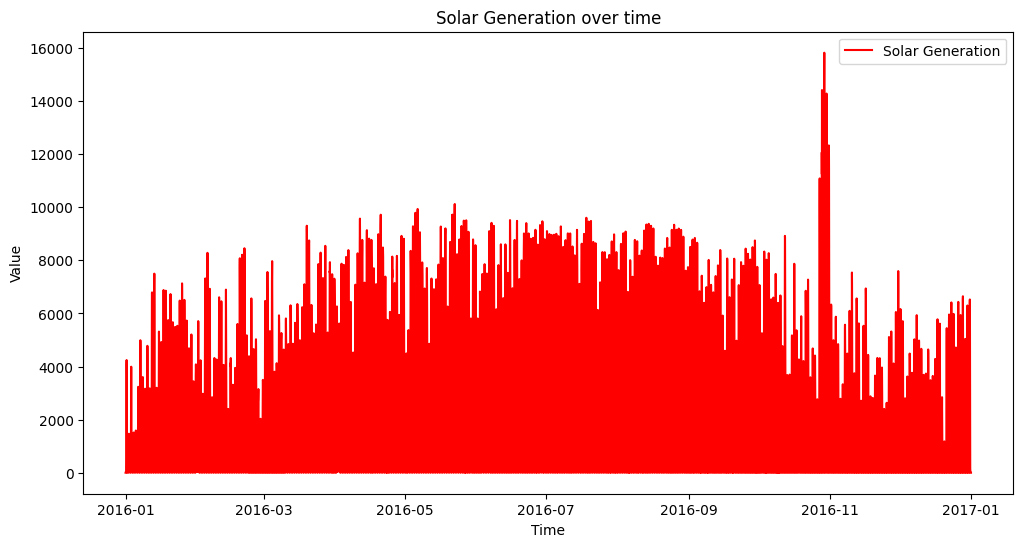

In [8]:
plt.figure(figsize=(12,6))

plt.plot(df['utc_timestamp'], df['IT_solar_generation'], label='Solar Generation', c='r')
plt.title('Solar Generation over time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Handle missing values

In [9]:
df.isnull().sum()

utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

In [10]:
df['IT_load_new'].fillna(method='ffill', inplace=True)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_2368\3049114959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IT_load_new'].fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_2368\3049114959.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IT_load_new'].fillna(method='ffill', inplace=True)


utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64

### Check for stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic', 'p-value'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value %s' %key] = value
    print(dfoutput)

In [16]:
print("ADF Test for 'IT_load_new' : \n")
adf_test(df['IT_load_new'])

ADF Test for 'IT_load_new' : 

Test Statistic       -1.197390e+01
p-value               3.841445e-22
Critical Value 1%    -3.431098e+00
Critical Value 5%    -2.861871e+00
Critical Value 10%   -2.566946e+00
dtype: float64


In [17]:
print("ADF Test for 'IT_solar_generation' : \n")
adf_test(df['IT_solar_generation'])

ADF Test for 'IT_solar_generation' : 

Test Statistic       -5.741335e+00
p-value               6.265438e-07
Critical Value 1%    -3.431098e+00
Critical Value 5%    -2.861870e+00
Critical Value 10%   -2.566946e+00
dtype: float64


### Vuild ARIMA model for 'IT_load_new'

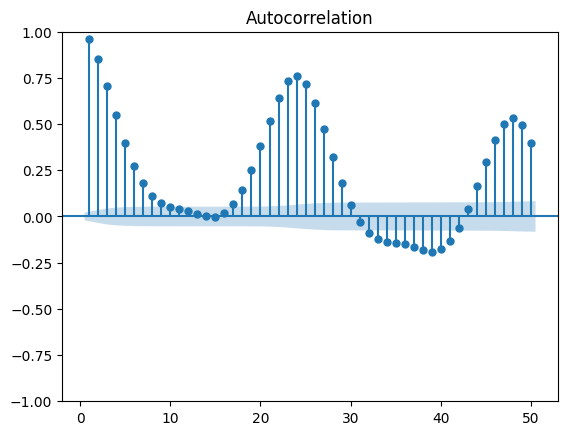

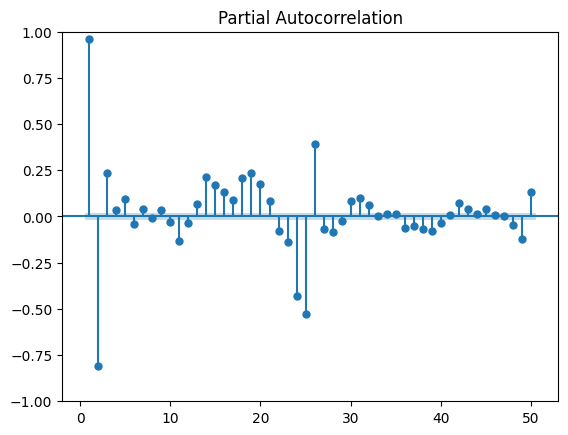

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['IT_load_new'], lags=50, zero=False)
plot_pacf(df['IT_load_new'], lags=50, zero=False)
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Splite train test data
train_size = int(len(df['IT_load_new']) * 0.8)
train, test = df['IT_load_new'][:train_size], df['IT_load_new'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(2,0,2))
model_fit = model.fit()

# Make prediction on the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
rmse

np.float64(7714.95213485845)

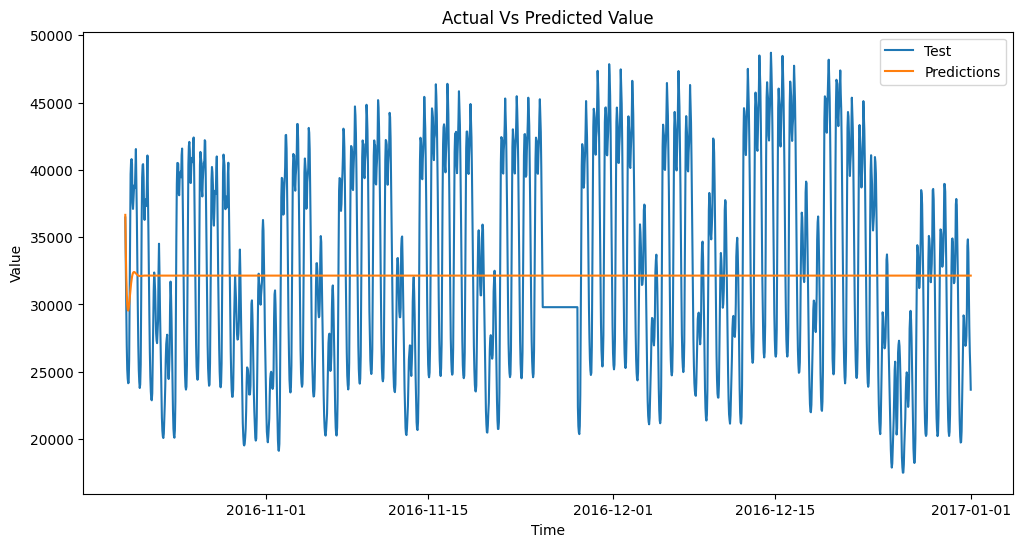

In [ ]:
# Plot actual vs Predicted values
plt.figure(figsize=(12,6))
plt.plot(df['utc_timestamp'][train_size:], test, label='Test')
plt.plot(df['utc_timestamp'][train_size:], predictions, label='Predictions')
plt.title('Actual Vs Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

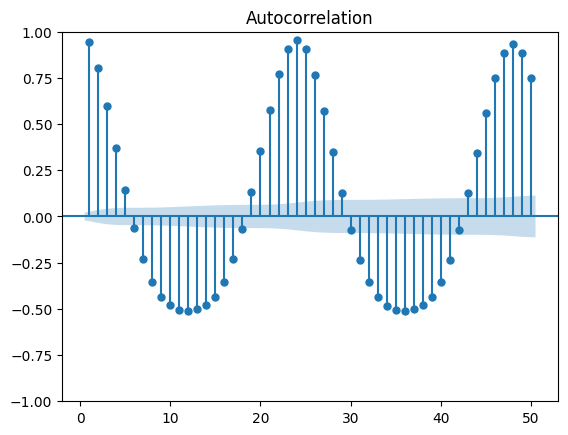

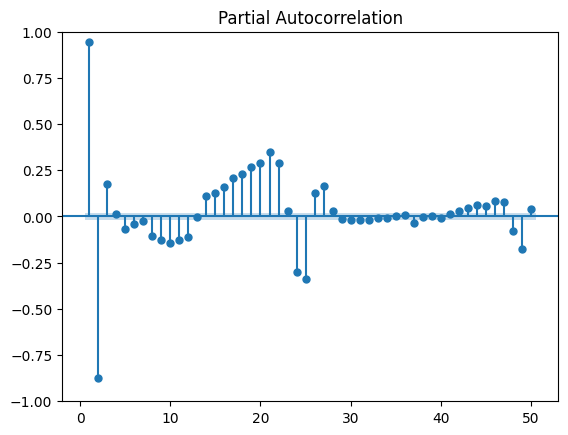

In [28]:
# Plot ACF and PACF for 'IT_solar_generation'
plot_acf(df['IT_solar_generation'], lags=50, zero=False)
plot_pacf(df['IT_solar_generation'], lags=50, zero=False)
plt.show()

In [29]:
# Splite train test data
train_size2 = int(len(df['IT_solar_generation']) * 0.8)
train2, test2 = df['IT_solar_generation'][:train_size2], df['IT_solar_generation'][train_size2:]

# Fit the ARIMA model
model2 = ARIMA(train2, order=(2,0,2))
model_fit2 = model2.fit()

# Make prediction on the test set
predictions2 = model_fit2.predict(start=len(train2), end=len(train2)+len(test2)-1)

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(test2, predictions2))
rmse2

np.float64(2486.150711088173)

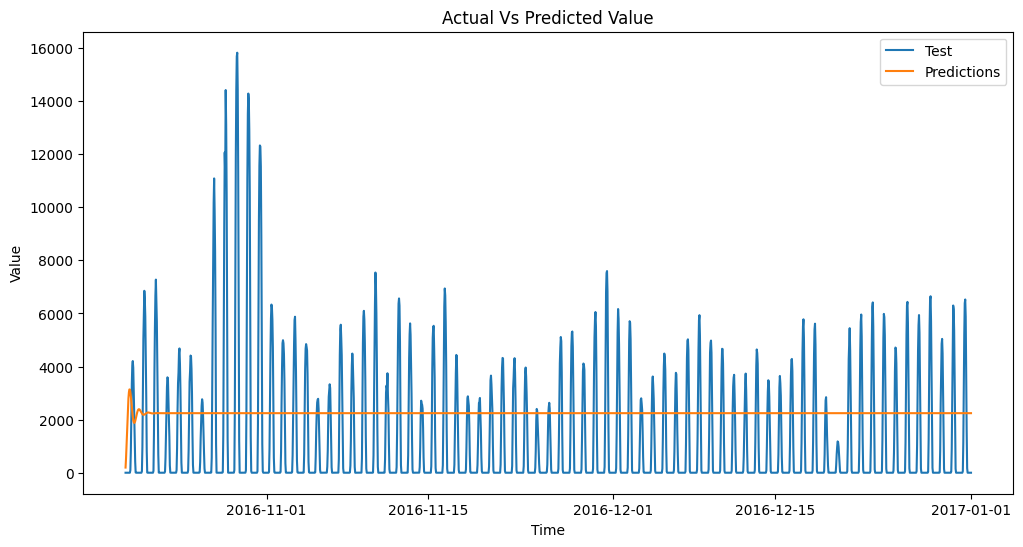

In [31]:
# Plot actual vs Predicted values
plt.figure(figsize=(12,6))
plt.plot(df['utc_timestamp'][train_size2:], test2, label='Test')
plt.plot(df['utc_timestamp'][train_size2:], predictions2, label='Predictions')
plt.title('Actual Vs Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()